In [754]:
import numpy as np
import scipy as sp
import networkx as nx
import seaborn as sns
from scipy.stats import wilcoxon
import community
import scipy.sparse as sp
import scipy.sparse.linalg as spalg
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

In [710]:
def compute_alpha(n, S_d, d_min=2):
    """
    Approximate the alpha of a power law distribution.
    Parameters
    ----------
    n: int or np.array of int
        Number of entries that are larger than or equal to d_min
    S_d: float or np.array of float
         Sum of log degrees in the distribution that are larger than or equal to d_min
    d_min: int
        The minimum degree of nodes to consider
    Returns
    -------
    alpha: float
        The estimated alpha of the power law distribution
    """

    return n / (S_d - n * np.log(d_min - 0.5)) + 1

def compute_log_likelihood(n, alpha, S_d, d_min=2):
    """
    Compute log likelihood of the powerlaw fit.
    Parameters
    ----------
    n: int
        Number of entries in the old distribution that are larger than or equal to d_min.
    alpha: float
        The estimated alpha of the power law distribution
    S_d: float
         Sum of log degrees in the distribution that are larger than or equal to d_min.
    d_min: int
        The minimum degree of nodes to consider
    Returns
    -------
    float: the estimated log likelihood
    """

    return n * np.log(alpha) + n * alpha * np.log(d_min) + (alpha + 1) * S_d

def filter_chisquare(ll_ratios, delta_cutoff=0.004):
    return ll_ratios < delta_cutoff

In [711]:
delta_cutoff = 0.004
d_min = 2

G_cora = nx.read_edgelist('../data/cora/cora.cites')
G_citeseer = nx.read_edgelist('../data/citeseer/citeseer.cites')

A_cora = nx.adjacency_matrix(G_cora)
A_citeseer = nx.adjacency_matrix(G_citeseer)

degrees_cora = np.asarray(np.sum(A_cora, axis=1)).reshape(-1)
degrees_citeseer = np.asarray(np.sum(A_citeseer, axis=1)).reshape(-1)

S_d_cora = np.sum(np.log(degrees_cora[degrees_cora >= d_min]))
S_d_citeseer = np.sum(np.log(degrees_citeseer[degrees_citeseer >= d_min]))

n_cora = np.sum(degrees_cora >= d_min)
n_citeseer = np.sum(degrees_citeseer >= d_min)

alpha_cora = compute_alpha(n_cora, S_d_cora, d_min)
alpha_citeseer = compute_alpha(n_citeseer, S_d_citeseer, d_min)

log_likelihood_cora = compute_log_likelihood(n_cora, alpha_cora, S_d_cora, d_min)
log_likelihood_citeseer = compute_log_likelihood(n_citeseer, alpha_citeseer, S_d_citeseer, d_min)

alphas_combined = compute_alpha(n_cora + n_citeseer, S_d_cora + S_d_citeseer, d_min)
ll_combined = compute_log_likelihood(n_cora + n_citeseer, alphas_combined, S_d_cora + S_d_citeseer, d_min)

ratios = -2 * ll_combined + 2 * (log_likelihood_cora + log_likelihood_citeseer)

In [712]:
alphas_combined

2.1840630597182678

In [713]:
log_likelihood_cora

13942.75280119968

In [660]:
ccoefs_cora = np.array(list(nx.clustering(G_cora, nodes=G_cora.nodes, weight=None).values()))
ccoefs_citeseer = np.array(list(nx.clustering(G_citeseer, nodes=G_citeseer.nodes, weight=None).values()))

In [661]:
np.mean(ccoefs_cora)

0.24067329850193736

In [662]:
nx.average_clustering(G_cora)

0.2406732985019372

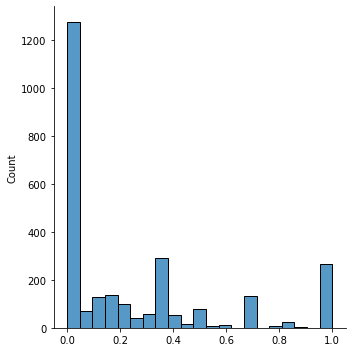

In [663]:
sns.displot(ccoefs_cora)

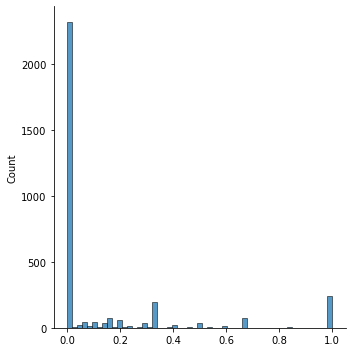

In [664]:
sns.displot(ccoefs_citeseer)

In [631]:
w, p = wilcoxon(ccoefs_cora - ccoefs_cora_new)

NameError: name 'ccoefs_cora_new' is not defined

In [632]:
w, p 

NameError: name 'w' is not defined

In [633]:
filter_chisquare(ratios)

False

In [715]:
delta_cutoff = 0.004
d_min = 2

G_cora = nx.read_edgelist('../data/cora/cora.cites')
G_cora_copy = nx.read_edgelist('../data/cora/cora.cites')
G_cora_copy.add_edge('35', '815073')
G_cora_copy.add_edge('103482', '1102364')
G_cora_copy.add_edge('35', '1102364')



A_cora = nx.adjacency_matrix(G_cora)
A_cora_copy = nx.adjacency_matrix(G_cora_copy)

degrees_cora = np.asarray(np.sum(A_cora, axis=1)).reshape(-1)
degrees_cora_copy = np.asarray(np.sum(A_cora_copy, axis=1)).reshape(-1)

S_d_cora = np.sum(np.log(degrees_cora[degrees_cora >= d_min]))
S_d_cora_copy = np.sum(np.log(degrees_cora_copy[degrees_cora_copy >= d_min]))

n_cora = np.sum(degrees_cora >= d_min)
n_cora_copy = np.sum(degrees_cora_copy >= d_min)

alpha_cora = compute_alpha(n_cora, S_d_cora, d_min)
alpha_cora_copy = compute_alpha(n_cora_copy, S_d_cora_copy, d_min)

log_likelihood_cora = compute_log_likelihood(n_cora, alpha_cora, S_d_cora, d_min)
log_likelihood_cora_copy = compute_log_likelihood(n_cora_copy, alpha_cora_copy, S_d_cora_copy, d_min)

alphas_combined = compute_alpha(n_cora + n_cora_copy, S_d_cora + S_d_cora_copy, d_min)
ll_combined = compute_log_likelihood(n_cora + n_cora_copy, alphas_combined, S_d_cora + S_d_cora_copy, d_min)

ratios = -2 * ll_combined + 2 * (log_likelihood_cora + log_likelihood_cora_copy)

In [719]:
np.array([min(z) for z in map(lambda x, y:(x,y), degrees_cora, degrees_cora_copy)])

array([168,   5,   6, ...,   4,   4,   2])

In [720]:
degrees_cora - degrees_cora_copy

array([-2,  0, -1, ...,  0,  0,  0])

In [635]:
ratios
# filter_chisquare(ratios)

5.3660740377381444e-05

In [95]:
alpha_cora

2.109672304917872

In [82]:
G_cora_copy.degree('35')

169

In [683]:
G_cora_degree_centralities = np.array(list(nx.degree_centrality(G_cora).values()))
G_cora_copy_degree_centralities = np.array(list(nx.degree_centrality(G_cora_copy).values()))

G_cora_clustering_coefficients = np.array(list(nx.clustering(G_cora).values()))
G_cora_copy_clustering_coefficients = np.array(list(nx.clustering(G_cora_copy).values()))

w_d, p_d = wilcoxon(G_cora_degree_centralities - G_cora_copy_degree_centralities)
w_c, p_c = wilcoxon(G_cora_clustering_coefficients - G_cora_copy_clustering_coefficients)

relative_degree_change = np.abs(G_cora_degree_centralities/G_cora_copy_degree_centralities - np.ones(len(G_cora_degree_centralities)))
relative_ccoef_change = np.nan_to_num(np.abs(G_cora_clustering_coefficients/G_cora_copy_clustering_coefficients - np.ones(len(G_cora_clustering_coefficients))))

/home/tduricic/Development/tools/anaconda3/envs/structack/lib/python3.6/site-packages/scipy/stats/morestats.py:2971: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
/home/tduricic/Development/tools/anaconda3/envs/structack/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


In [704]:
from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import kendalltau
from scipy.stats import norm

print(pearsonr(G_cora_degree_centralities, G_cora_copy_degree_centralities))
print(spearmanr(G_cora_degree_centralities, G_cora_copy_degree_centralities))
print(kendalltau(G_cora_degree_centralities, G_cora_copy_degree_centralities))
print(stats.ks_2samp(G_cora_degree_centralities, G_cora_copy_degree_centralities))

print(pearsonr(G_cora_clustering_coefficients, G_cora_copy_clustering_coefficients))
print(spearmanr(G_cora_clustering_coefficients, G_cora_copy_clustering_coefficients))
print(kendalltau(G_cora_clustering_coefficients, G_cora_copy_clustering_coefficients))
print(stats.ks_2samp(G_cora_clustering_coefficients, G_cora_copy_clustering_coefficients))

(0.9999425988935633, 0.0)
SpearmanrResult(correlation=0.9995723215409741, pvalue=0.0)
KendalltauResult(correlation=0.9992796665586081, pvalue=0.0)
KstestResult(statistic=0.00036927621861152144, pvalue=0.9999999999999998)
(0.9992084737181816, 0.0)
SpearmanrResult(correlation=0.9998720613410308, pvalue=0.0)
KendalltauResult(correlation=0.999645885907266, pvalue=0.0)
KstestResult(statistic=0.00036927621861152144, pvalue=0.9999999999999998)


In [708]:
print(stats.ks_2samp(G_cora_clustering_coefficients, G_cora_copy_clustering_coefficients)[0])

0.00036927621861152144


/home/tduricic/Development/tools/anaconda3/envs/structack/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

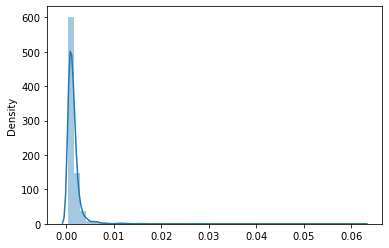

In [703]:
sns.distplot(G_cora_degree_centralities)

In [685]:
print(np.mean(relative_degree_change))
print(np.nanmean(np.where(relative_degree_change!=0,relative_degree_change,np.nan),0))
print(np.mean(relative_ccoef_change))
print(np.nanmean(np.where(relative_ccoef_change!=0,relative_ccoef_change,np.nan),0))

0.000426374390228765
0.2886554621848739
0.000769693373263905
0.6947765515995515


0.24043055816946912

array([0.01176471,        nan, 0.14285714, ...,        nan,        nan,
              nan])

In [648]:
G_cora_copy_degree_centralities - G_cora_degree_centralities

array([0.00073883, 0.        , 0.00036941, ..., 0.        , 0.        ,
       0.        ])

In [19]:
adj = nx.to_scipy_sparse_matrix(G_cora)

In [59]:
# sigma = D^-1/2 (alpha^4*A^4 + alpha^3*A^3 + alpha^2*A^2 + alpha*A + I) * D^-1/2

In [104]:
rows = [0,5,7]
alpha = 0.1
n_steps = 4
temp_sum = 0
for i in range(1, n_steps):
    temp_sum += alpha**i*adj**i
D_sqrt = nx.linalg.laplacianmatrix.laplacian_matrix(G_cora) + adj
D_sqrt.data = np.sqrt(D_sqrt.data)
sigma = D_sqrt*(temp_sum + sp.sparse.identity(adj.shape[0], format='csr'))*D_sqrt
cols = []
for i in rows:
    cols.append(np.sort(sigma[i,:].nonzero()[1])[sigma[sigma[i,:].nonzero()[0], np.sort(sigma[i,:].nonzero()[1])].argmin()])

In [105]:
cols

[982, 181, 186]

In [101]:
np.sort(sigma[0,:].nonzero()[1])[509]

982

In [107]:
sigma[7,186]

0.008485281374238571

In [103]:
sigma[sigma[0,:].nonzero()[0], np.sort(sigma[0,:].nonzero()[1])].argmin()
sigma[sigma[0,:].nonzero()[0], np.sort(sigma[0,:].nonzero()[1])].min()

0.012961481396815723

In [92]:
sigma[0,1]

8.376015759297497

In [78]:
sigma[sigma[i,:].nonzero()][0,0]

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [50]:
sigma[sigma[0,:].nonzero()]

(1, 899)

In [91]:
print(sigma[sigma[0,:].nonzero()[0], np.sort(sigma[0,:].nonzero()[1])].min())
print()
print(sigma[sigma[0,:].nonzero()[0], np.sort(sigma[0,:].nonzero()[1])][0,1])

0.012961481396815723
509
8.376015759297497


In [90]:
print(sigma[sigma[0,:].nonzero()[0], sigma[0,:].nonzero()[1]].min())
print(sigma[sigma[0,:].nonzero()[0], sigma[0,:].nonzero()[1]].argmin())
print(sigma[sigma[0,:].nonzero()[0], sigma[0,:].nonzero()[1]][0,1])

0.012961481396815723
498
0.2851525907299459


In [173]:
sigma[0,:].nonzero()[1][sigma[sigma[0,:].nonzero()].argmin()]

982

In [527]:
sigma.eliminate_zeros()
sigma[0,:].argmin()

172

In [556]:
A = nx.to_scipy_sparse_matrix(G_cora)
G_cora = nx.from_scipy_sparse_matrix(A)

In [614]:
node_community_mapping = community.community_louvain.best_partition(G_cora) 

In [619]:
node_community_mapping[2567]

83

In [620]:
community_node_mapping[83]

[2567, 2568]

In [621]:
community_node_mapping = {}
community_edge_counts = {}

for edge in G_cora.edges:
    if node_community_mapping[edge[0]] not in community_node_mapping:
        community_node_mapping[node_community_mapping[edge[0]]] = []
    if node_community_mapping[edge[1]] not in community_node_mapping:
        community_node_mapping[node_community_mapping[edge[1]]] = []
    if edge[0] not in community_node_mapping[node_community_mapping[edge[0]]]:
        community_node_mapping[node_community_mapping[edge[0]]].append(edge[0])
    if edge[1] not in community_node_mapping[node_community_mapping[edge[1]]]:
        community_node_mapping[node_community_mapping[edge[1]]].append(edge[1])
    if node_community_mapping[edge[0]] == node_community_mapping[edge[1]]:
        continue
    if (node_community_mapping[edge[0]], node_community_mapping[edge[1]]) not in community_edge_counts:
        community_edge_counts[(node_community_mapping[edge[0]], node_community_mapping[edge[1]])] = 0
    if (node_community_mapping[edge[1]], node_community_mapping[edge[0]]) not in community_edge_counts:
        community_edge_counts[(node_community_mapping[edge[1]], node_community_mapping[edge[0]])] = 0
    community_edge_counts[(node_community_mapping[edge[0]], node_community_mapping[edge[1]])] += 1
    community_edge_counts[(node_community_mapping[edge[1]], node_community_mapping[edge[0]])] += 1
    
adj_community_rows = []
adj_community_cols = []
adj_community_data = []

for key in community_edge_counts:
    adj_community_rows.append(key[0])
    adj_community_cols.append(key[1])
    adj_community_data.append(community_edge_counts[key])
    
adj_community = sp.sparse.csr_matrix((adj_community_data, (adj_community_rows, adj_community_cols)))
adj_community = adj_community.toarray().astype('float')
adj_community[adj_community == 0] = np.nan

distant_communities = {}
for community_id in range(adj_community.shape[0]):
    distant_community_id = np.argpartition(adj_community[community_id], 1)[:1][0]
    while distant_community_id == 0 or distant_community_id == community_id:
        distant_community_id = np.random.choice(adj_community.shape[0], 1)[0]
    distant_communities[community_id] = distant_community_id

rows = [0,1,5]
cols = []
for node_id in rows:
    community_id = node_community_mapping[node_id]
    distant_community_id = distant_communities[community_id]
    print(str(community_id) + ' ' + str(distant_community_id))
    cols.append(np.random.choice(community_node_mapping[distant_community_id],1)[0])

0 8
0 8
0 8


In [592]:
cols

[798, 1970, 1257]

In [618]:
for i in range(len(rows)):
    print(rows[i], ' from ', node_community_mapping[rows[i]], ' connected to ', cols[i], ' from ', node_community_mapping[cols[i]])

0  from  0  connected to  2397  from  8
1  from  0  connected to  2428  from  8
5  from  0  connected to  2040  from  8


In [486]:
idx = np.argpartition(adj_community[0], 5)
print(idx[:5])
print(adj_community[0][idx[:5]])

[17  7 13 14  6]
[1. 1. 1. 1. 2.]


In [433]:
idx

array([ 14,  20,  15,  18,   6,   7,  10,   3,   4,   9,   5,  11,  73,
         1,  79,   2,  74,   8,  71,  75,  76,  77,  78,  65,  72,  81,
        70,  69,  68,  67,  66,  89,  64,  63,  62,  80,  60,  82,  83,
        84,  85,  86,  87,  88,  51,  90,  91,  92,  93,  94,  95,  96,
        97,  98,  99, 100, 101, 102,  61,   0,  59,  58,  57,  56,  55,
        54,  53,  52,  50,  49,  48,  47,  46,  45,  44,  43,  42,  41,
        40,  39,  38,  37,  36,  35,  34,  33,  32,  31,  30,  29,  28,
        27,  26,  25,  24,  23,  22,  21,  19,  17,  16,  13,  12, 103])

In [418]:
ind = np.argpartition(adj_community, 1, axis=1)[:, : - 1]
rows = np.arange(adj_community.shape[0])[:, None]
adj_community[rows, ind] = 0

In [419]:
adj_community[0]

array([       0,        0,        0,        0,        0,        0,
              0,        0,        0,        0,        0,        0,
              0,        0,        0,        0,        0,        0,
              0,        0,        0,        0,        0,        0,
              0,        0,        0,        0,        0,        0,
              0,        0,        0,        0,        0,        0,
              0,        0,        0,        0,        0,        0,
              0,        0,        0,        0,        0,        0,
              0,        0,        0,        0,        0,        0,
              0,        0,        0,        0,        0,        0,
              0,        0,        0,        0,        0,        0,
              0,        0,        0,        0,        0,        0,
              0,        0,        0,        0,        0,        0,
              0,        0,        0,        0,        0,        0,
              0,        0,        0,        0,        0,      

In [319]:
adj_community[0].toarray()

array([[ 0,  7,  3,  2,  3,  5,  7,  8, 15,  7,  0,  1,  2,  0,  0,  1,
         0,  0,  0,  1,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0]])

In [289]:
adj_community[adj_community>=adj_community[np.arange(len(adj_community)), np.argpartition(adj_community,3,axis=1)[:,3],None]] = 0

In [290]:
adj_community[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [263]:
type(adj_community)

numpy.ndarray

In [292]:
a = np.array([[1, 3, 3, 3, 5],
       [4, 3, 6, 1, 0],
       [6, 5, 3, 1, 2]])
a[a>=a[np.arange(len(a)), np.argpartition(a,3,axis=1)[:,3],None]] = 0
a

array([[1, 0, 0, 0, 0],
       [0, 3, 0, 1, 0],
       [0, 0, 3, 1, 2]])

In [264]:
type(a)

numpy.ndarray

In [190]:
sigma[0,982]
sigma[5,2247]
sigma[7,1284]

0.0048989794855663574

In [126]:
dd = [min_sparse(x) for x in (sigma.getrow(i) for i in range(sigma.shape[0]))]

In [149]:
sigma[1,:].nonzero()[1][sigma[sigma[1,:].nonzero()].argmin()]

328

In [181]:
sigma[1,:].nonzero()[1][sigma[sigma[1,:].nonzero()].argmin()]

328

In [182]:
sigma[1,328]

0.0022360679774997903

In [169]:
sigma.shape

(2708, 2708)

In [117]:
col_argmax = [sigma.getcol(i).A.argmax() for i in range(A.shape[1])]

In [136]:
theta = np.array([0,1,2,3]).reshape(4,1)

In [137]:
np.argmin(theta[np.nonzero(theta)])

0

In [139]:
i,j = np.where( theta==np.min(theta[np.nonzero(theta)]))

In [140]:
i,j

(array([1]), array([0]))

In [727]:
from scipy import sparse
G = nx.karate_club_graph()

In [728]:
A = nx.to_numpy_matrix(G)

In [732]:
sA = sp.csr_matrix(A)

In [870]:
def katz_connection(adj, nodes, n_perturbations, threshold=0.000001, nsteps=10000):
    graph = nx.from_scipy_sparse_matrix(adj, create_using=nx.Graph)
    rows = nodes[:n_perturbations]
    D = nx.linalg.laplacianmatrix.laplacian_matrix(graph) + adj
    D_inv = spalg.inv(D)
    D_invA = D_inv * adj
    l,v = spalg.eigs(D_invA, k=1, which="LR")
    lmax = l[0].real
    alpha = (1/lmax) * 0.9
    sigma = sp.csr_matrix(D_invA.shape, dtype=np.float)
    print('Calculate sigma matrix')
    for i in range(nsteps):
        sigma_new = alpha *D_invA*sigma + sp.identity(adj.shape[0], dtype=np.float, format='csr')
        diff = abs(spalg.norm(sigma, 1) - spalg.norm(sigma_new, 1))
        sigma = sigma_new
        print(diff)
        if diff < threshold:
            break
        print('Number of steps taken: ' + str(i))
    cols = []
    for i in rows:
        cols.append(np.argmin(sigma[i, :].todense(), axis=1)[0,0])
    return sigma, [[u, v] for u, v in zip(rows, cols)]

def community_connection(adj, nodes, n_perturbations):
    graph = nx.from_scipy_sparse_matrix(adj, create_using=nx.Graph)
    rows = nodes[:n_perturbations]

    node_community_mapping = community.community_louvain.best_partition(graph)
    
    community_node_mapping = {}
    community_edge_counts = {}
    communities = list(set(node_community_mapping.values()))
    for source_community in communities:
        for target_community in communities:
            community_edge_counts[(source_community, target_community)] = 0
            community_edge_counts[(target_community, source_community)] = 0

    for edge in graph.edges:
        if node_community_mapping[edge[0]] not in community_node_mapping:
            community_node_mapping[node_community_mapping[edge[0]]] = []
        if node_community_mapping[edge[1]] not in community_node_mapping:
            community_node_mapping[node_community_mapping[edge[1]]] = []
        if edge[0] not in community_node_mapping[node_community_mapping[edge[0]]]:
            community_node_mapping[node_community_mapping[edge[0]]].append(edge[0])
        if edge[1] not in community_node_mapping[node_community_mapping[edge[1]]]:
            community_node_mapping[node_community_mapping[edge[1]]].append(edge[1])
        community_edge_counts[(node_community_mapping[edge[0]], node_community_mapping[edge[1]])] += 1
        community_edge_counts[(node_community_mapping[edge[1]], node_community_mapping[edge[0]])] += 1

    adj_community_rows = []
    adj_community_cols = []
    adj_community_data = []

    for key in community_edge_counts:
        adj_community_rows.append(key[0])
        adj_community_cols.append(key[1])
        adj_community_data.append(community_edge_counts[key])

    adj_community = sp.csr_matrix((adj_community_data, (adj_community_rows, adj_community_cols)))
    adj_community = adj_community.toarray().astype('float')

    distant_communities = {}
    for community_id in range(adj_community.shape[0]):
        distant_community_id = np.random.choice(np.argwhere(adj_community[community_id,:]==np.min(adj_community[community_id,:])).flatten(), 1)[0]
        distant_communities[community_id] = distant_community_id

    cols = []
    for node_id in rows:
        community_id = node_community_mapping[node_id]
        distant_community_id = distant_communities[community_id]
        cols.append(np.random.choice(community_node_mapping[distant_community_id], 1)[0])
    return [[u, v] for u, v in zip(rows, cols)]

In [871]:
sigma, result_katz = katz_connection(sA, range(sA.shape[0]), sA.shape[0])
result_community, community_edge_counts, distant_communities, node_community_mapping = community_connection(sA, range(sA.shape[0]), sA.shape[0])
distant_communities

/home/tduricic/Development/tools/anaconda3/envs/structack/lib/python3.6/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:318: SparseEfficiencyWarning: splu requires CSC matrix format
  warn('splu requires CSC matrix format', SparseEfficiencyWarning)
/home/tduricic/Development/tools/anaconda3/envs/structack/lib/python3.6/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:216: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  'is in the CSC matrix format', SparseEfficiencyWarning)


Calculate sigma matrix
1.0
Number of steps taken: 0
5.1900000000000075
Number of steps taken: 1
1.7732272058823542
Number of steps taken: 2
3.4132252500000124
Number of steps taken: 3
1.9098419274727068
Number of steps taken: 4
2.464269951694293
Number of steps taken: 5
1.7429330782705694
Number of steps taken: 6
1.8767503408873338
Number of steps taken: 7
1.4943603136251582
Number of steps taken: 8
1.4729572136576792
Number of steps taken: 9
1.2458952937937084
Number of steps taken: 10
1.174748779714811
Number of steps taken: 11
1.024707248179464
Number of steps taken: 12
0.944657862519211
Number of steps taken: 13
0.8369754388187367
Number of steps taken: 14
0.762747504713392
Number of steps taken: 15
0.6811599836325257
Number of steps taken: 16
0.6170805233656438
Number of steps taken: 17
0.5532687806194865
Number of steps taken: 18
0.4996845632329183
Number of steps taken: 19
0.44890315347565135
Number of steps taken: 20
0.40477821513090007
Number of steps taken: 21
0.3639989989987

{0: 3, 1: 3, 2: 1, 3: 1}

In [872]:
community_edge_counts

{(0, 0): 48,
 (0, 1): 4,
 (1, 0): 4,
 (0, 2): 8,
 (2, 0): 8,
 (0, 3): 2,
 (3, 0): 2,
 (1, 1): 12,
 (1, 2): 0,
 (2, 1): 0,
 (1, 3): 0,
 (3, 1): 0,
 (2, 2): 50,
 (2, 3): 5,
 (3, 2): 5,
 (3, 3): 8}

In [876]:
result_katz

[[0, 26],
 [1, 11],
 [2, 11],
 [3, 26],
 [4, 26],
 [5, 26],
 [6, 26],
 [7, 26],
 [8, 11],
 [9, 11],
 [10, 26],
 [11, 26],
 [12, 26],
 [13, 11],
 [14, 11],
 [15, 11],
 [16, 26],
 [17, 26],
 [18, 11],
 [19, 11],
 [20, 11],
 [21, 26],
 [22, 11],
 [23, 11],
 [24, 11],
 [25, 11],
 [26, 11],
 [27, 11],
 [28, 11],
 [29, 11],
 [30, 11],
 [31, 11],
 [32, 11],
 [33, 11]]

In [883]:
print(sigma[24, :])

  (0, 0)	0.5761758810795738
  (0, 1)	0.3040807399564036
  (0, 2)	0.5021865047417802
  (0, 3)	0.20180279398956197
  (0, 4)	0.07756004718555637
  (0, 5)	0.09725397412165944
  (0, 6)	0.09725397412165944
  (0, 7)	0.13828516588728101
  (0, 8)	0.22123186563799785
  (0, 9)	0.09839911028428577
  (0, 10)	0.07756004718555637
  (0, 11)	0.03240989182465606
  (0, 12)	0.06268030943702035
  (0, 13)	0.19148749223087652
  (0, 14)	0.10434570189395512
  (0, 15)	0.10434570189395508
  (0, 16)	0.04376428538260679
  (0, 17)	0.06281796433422644
  (0, 18)	0.10434570189395506
  (0, 19)	0.11602029067782194
  (0, 20)	0.10434570189395512
  (0, 21)	0.06281796433422644
  (0, 22)	0.10434570189395506
  (0, 23)	0.496030402942641
  (0, 24)	1.463095361595377
  (0, 25)	0.6540934424858215
  (0, 26)	0.10767103024657687
  (0, 27)	0.6266131883204349
  (0, 28)	0.2242784747339583
  (0, 29)	0.24208313506245022
  (0, 30)	0.17457550873229508
  (0, 31)	0.8391957729049488
  (0, 32)	0.6819116938190604
  (0, 33)	1.0049328590047923


In [874]:
result_community

[[0, 28],
 [1, 25],
 [2, 31],
 [3, 28],
 [4, 28],
 [5, 31],
 [6, 25],
 [7, 31],
 [8, 10],
 [9, 31],
 [10, 25],
 [11, 31],
 [12, 25],
 [13, 24],
 [14, 4],
 [15, 5],
 [16, 25],
 [17, 28],
 [18, 4],
 [19, 28],
 [20, 10],
 [21, 24],
 [22, 4],
 [23, 6],
 [24, 10],
 [25, 16],
 [26, 10],
 [27, 5],
 [28, 10],
 [29, 4],
 [30, 6],
 [31, 5],
 [32, 4],
 [33, 16]]

In [880]:
sigma[28, ]

<1x34 sparse matrix of type '<class 'numpy.float64'>'
	with 34 stored elements in Compressed Sparse Row format>

In [820]:
distant_communities

{0: 3, 1: 3, 2: 3, 3: 2}

In [817]:
list(set(node_community_mapping.values()))

[0, 1, 2, 3]

In [791]:
print(result_community)

[[0, 23], [1, 23], [2, 25], [3, 25], [4, 24], [5, 25], [6, 31], [7, 27], [8, 24], [9, 27], [10, 27], [11, 28], [12, 25], [13, 23], [14, 25], [15, 24], [16, 23], [17, 24], [18, 31], [19, 24], [20, 24], [21, 27], [22, 24], [23, 5], [24, 5], [25, 4], [26, 24], [27, 5], [28, 4], [29, 25], [30, 28], [31, 6], [32, 27], [33, 28]]


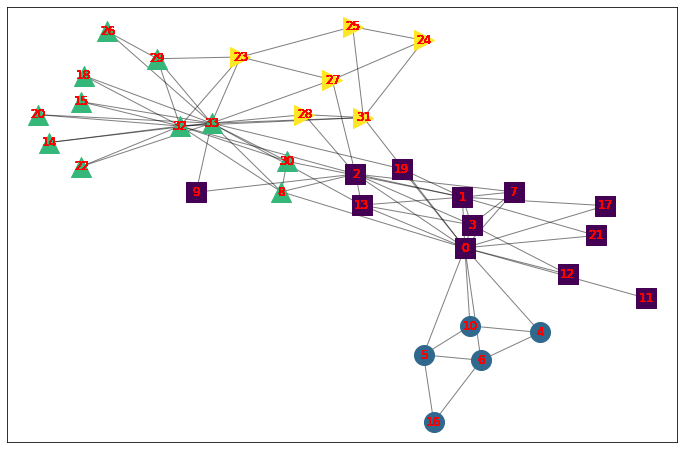

In [787]:
# load the karate club graph
G = nx.karate_club_graph()

# compute the best partition
partition = community.best_partition(G)

cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
shapes = 'so^>v<dph8'

plt.figure(figsize=(12,8))
# draw the graph
pos = nx.spring_layout(G)
# color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_edges(G, pos, alpha=0.5)
for node, color in partition.items():
    nx.draw_networkx_nodes(G, pos, [node], node_size=400,
                           node_color=[cmap.colors[color]],
                           node_shape=shapes[color])
    nx.draw_networkx_labels(G,pos,font_color='red')